## Read/check HRES_POST Data

This script validates postprocessing for HRES data, including checking original data, preprocessing steps, and ensuring data integrity.

In [1]:
# import libraries and directories
from py_env_hpc import *

2025-03-17 12:15:43.757516: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


### 1. Check the postprocessed HRES data in `HRES_DUMP3`

- Check the values, time, and number of steps (e.g. 91)


In [27]:
file=sorted(os.listdir(HRES_DUMP2))[0]
print(file)
data = xr.open_dataset(HRES_DUMP2+"/"+file)
data
#data["tp"][:, 100, 100].values
data["pr"][:, 100, 100].time
#data["tp"][:, 100, 100].values.shape

#print("OK")

ADAPTER_DE05.day01.merged.20180101.nc


<xarray.DataArray 'time' (time: 11)>
array(['2018-01-01T13:00:00.000000000', '2018-01-01T14:00:00.000000000',
       '2018-01-01T15:00:00.000000000', '2018-01-01T16:00:00.000000000',
       '2018-01-01T17:00:00.000000000', '2018-01-01T18:00:00.000000000',
       '2018-01-01T19:00:00.000000000', '2018-01-01T20:00:00.000000000',
       '2018-01-01T21:00:00.000000000', '2018-01-01T22:00:00.000000000',
       '2018-01-01T23:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time       (time) datetime64[ns] 2018-01-01T13:00:00 ... 2018-01-01T23:00:00
    longitude  float32 8.9
    latitude   float32 46.5
Attributes:
    standard_name:  time
    long_name:      time
    axis:           T

### 2. Check the postprocessed HRES data in `HRES_POST`

- Check the values, time, and number of steps (e.g. 91)
- Compare with files in `HRES_OR`.


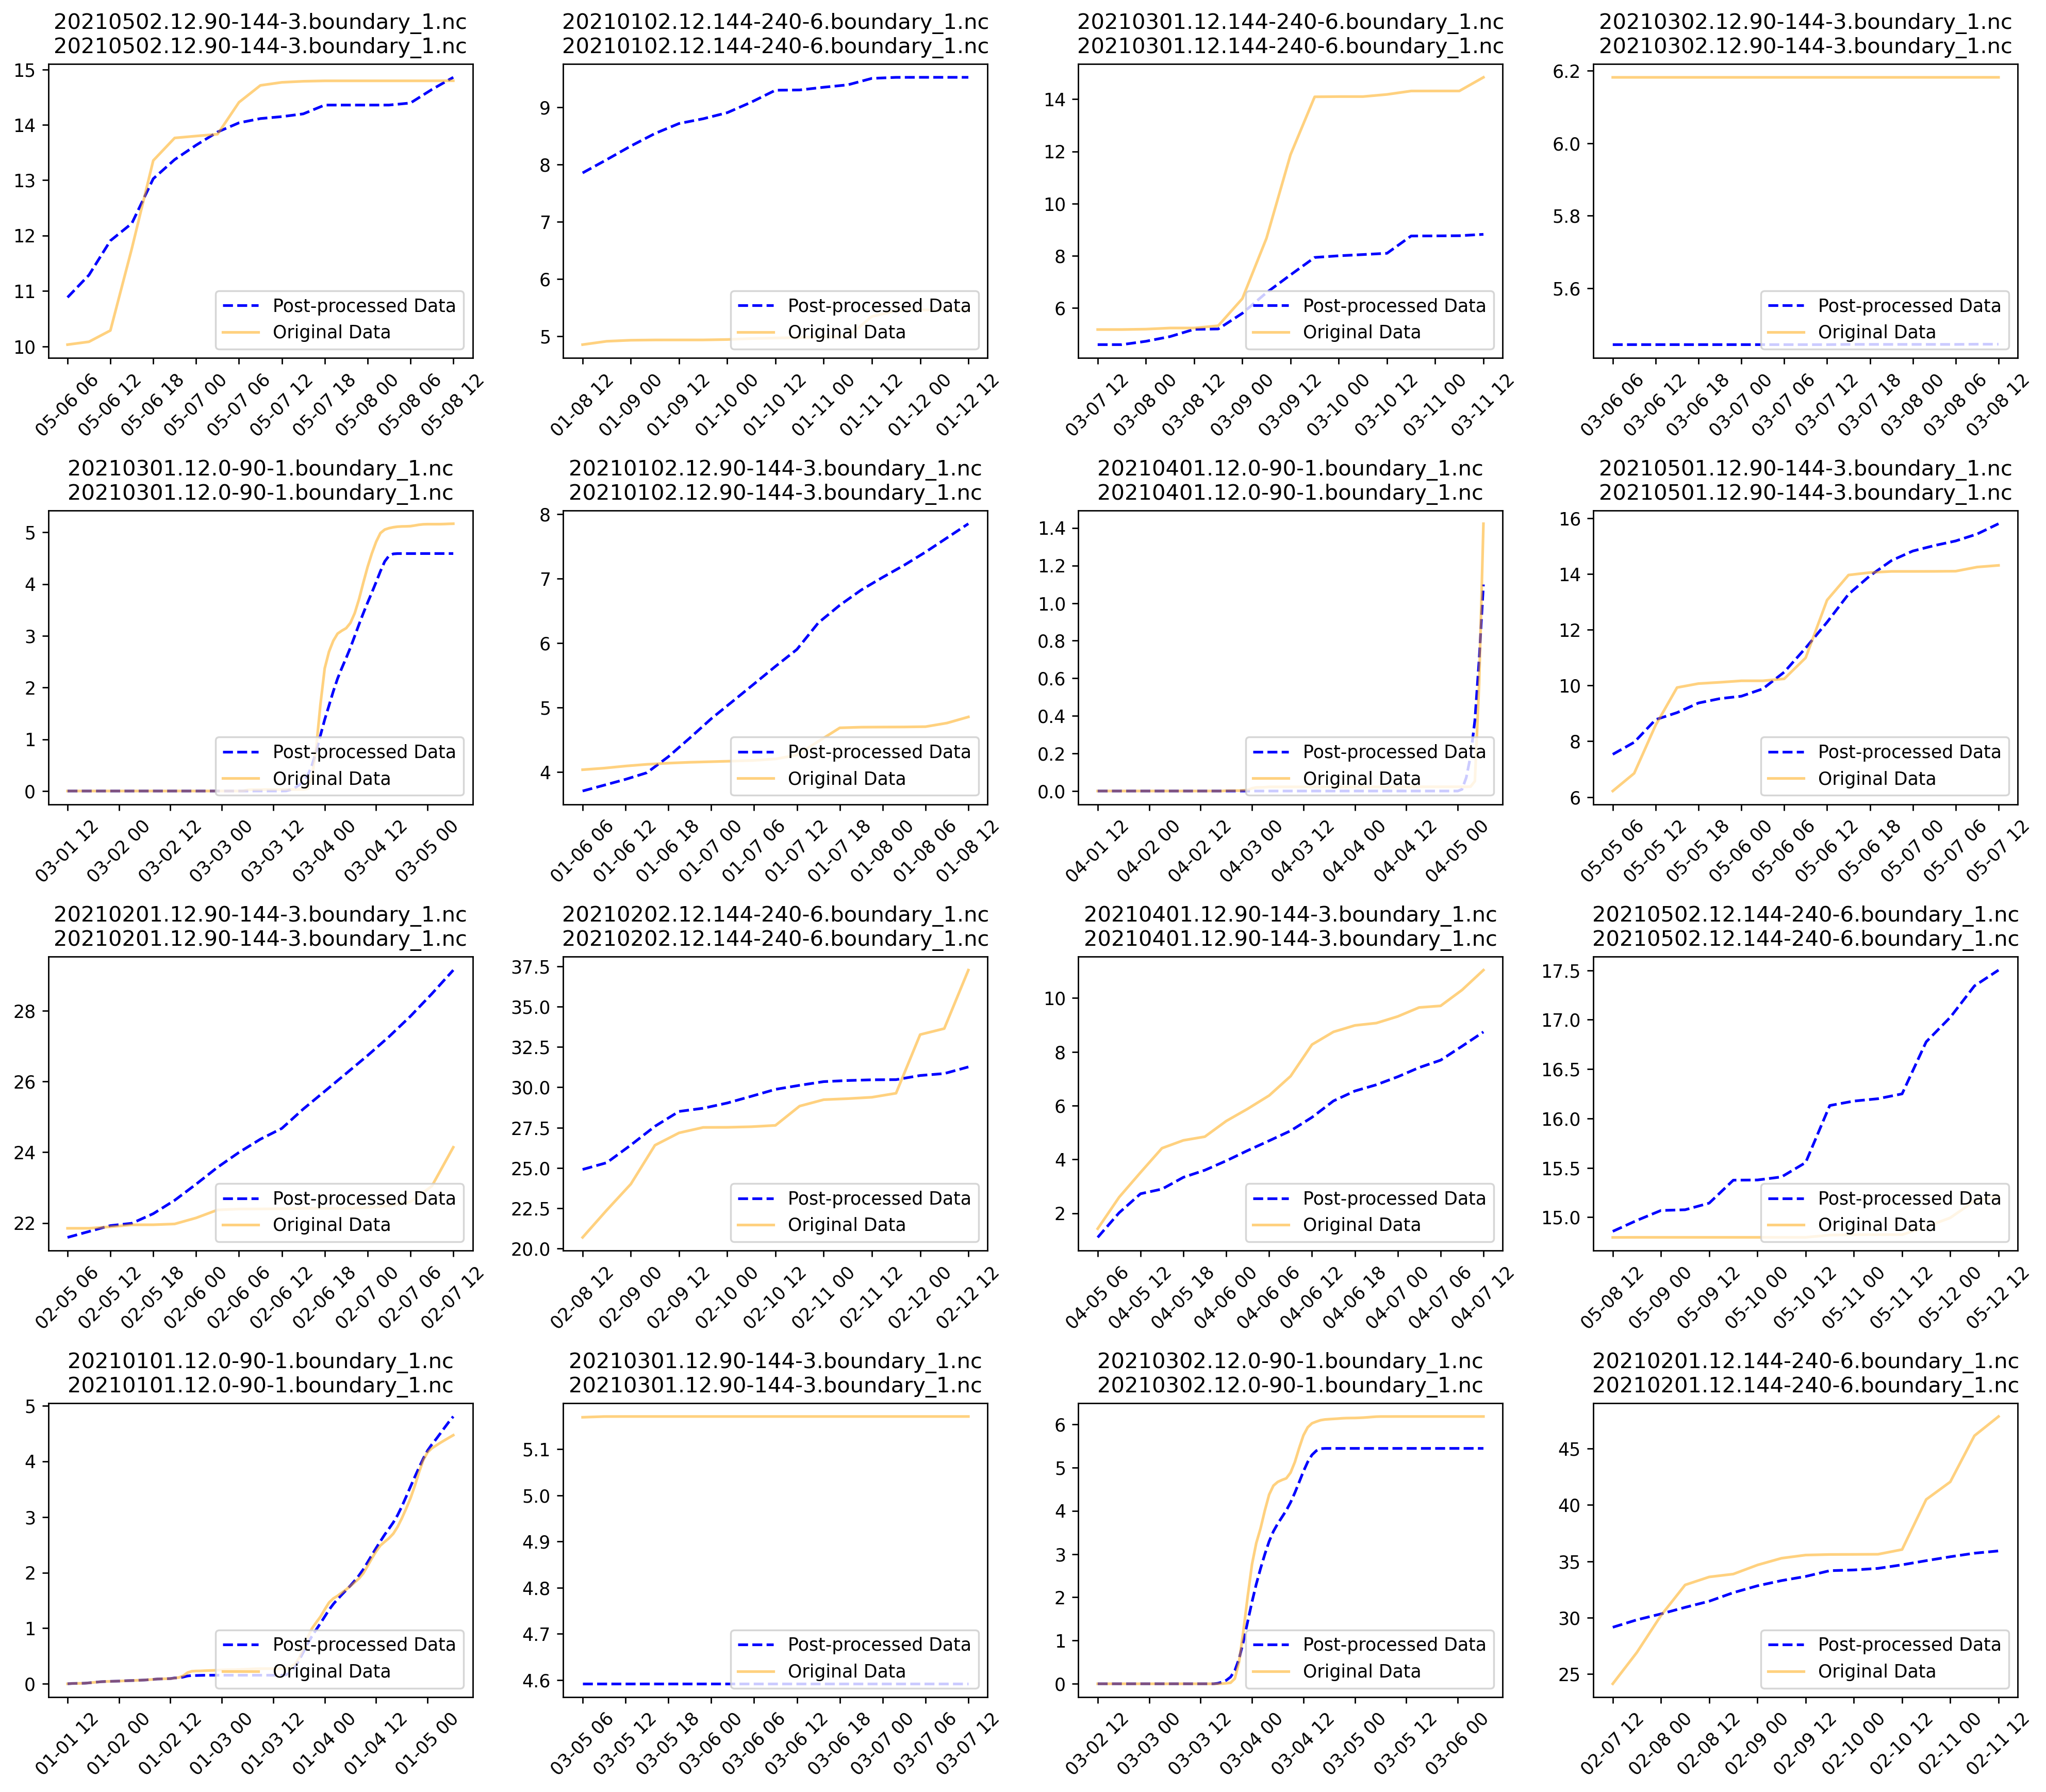

In [3]:
import random
import os
import xarray as xr
import matplotlib.pyplot as plt

# List files
files_post = sorted(os.listdir(HRES_POST))
files_or = sorted(os.listdir(HRES_OR))

# Take 9 random files from HRES_POST
random_files_post = random.sample(files_post, 16)

# Find equivalent files in HRES_OR
random_files_or = [file.replace('.tp.nc', '.nc') for file in random_files_post]

# Initialize plot
fig, axs = plt.subplots(4, 4, figsize=(16,14), dpi=250)

# Loop through random files and plot
for i, (file_post, file_or) in enumerate(zip(random_files_post, random_files_or)):
    # Read data
    data_post = xr.open_dataset(os.path.join(HRES_POST, file_post))
    data_or = xr.open_dataset(os.path.join(HRES_OR, file_or))
    
    # Calculate areal average over time
    areal_avg_data_post = data_post["tp"][:, 50:60, 50:60].mean(dim=['longitude', 'latitude'])*1000
    areal_avg_data_or = data_or["tp"][:, 50:60, 50:60].mean(dim=['longitude', 'latitude'])*1000
    
    # Plot
    ax = axs[i // 4, i % 4]
    ax.plot(areal_avg_data_post['time'], areal_avg_data_post, label='Post-processed Data', color='blue', ls='--', alpha=1)
    ax.plot(areal_avg_data_or['time'], areal_avg_data_or, label='Original Data', color='orange', alpha=0.5)
    ax.set_title(f"{file_post[13:]}\n{file_or[13:]}")
    ax.legend(loc="lower right")
    ax.tick_params(axis='x', rotation=45)

# Show plot
plt.tight_layout()
plt.show()


In [65]:
files_post[-10:]

['ADAPTER_DE05_20180313.12.90-144-3.boundary_1.nc',
 'ADAPTER_DE05_20180314.12.0-90-1.boundary_1.nc',
 'ADAPTER_DE05_20180314.12.144-240-6.boundary_1.nc',
 'ADAPTER_DE05_20180314.12.90-144-3.boundary_1.nc',
 'ADAPTER_DE05_20180315.12.0-90-1.boundary_1.nc',
 'ADAPTER_DE05_20180315.12.144-240-6.boundary_1.nc',
 'ADAPTER_DE05_20180315.12.90-144-3.boundary_1.nc',
 'ADAPTER_DE05_20180316.12.0-90-1.boundary_1.nc',
 'ADAPTER_DE05_20180316.12.144-240-6.boundary_1.nc',
 'ADAPTER_DE05_20180316.12.90-144-3.boundary_1.nc']

In [66]:
files_or[-10:]

['ADAPTER_DE05_20231228.12.90-144-3.boundary_1.nc',
 'ADAPTER_DE05_20231229.12.0-90-1.boundary_1.nc',
 'ADAPTER_DE05_20231229.12.144-240-6.boundary_1.nc',
 'ADAPTER_DE05_20231229.12.90-144-3.boundary_1.nc',
 'ADAPTER_DE05_20231230.12.0-90-1.boundary_1.nc',
 'ADAPTER_DE05_20231230.12.144-240-6.boundary_1.nc',
 'ADAPTER_DE05_20231230.12.90-144-3.boundary_1.nc',
 'ADAPTER_DE05_20231231.12.0-90-1.boundary_1.nc',
 'ADAPTER_DE05_20231231.12.144-240-6.boundary_1.nc',
 'ADAPTER_DE05_20231231.12.90-144-3.boundary_1.nc']

In [29]:
len(files_post)

6345

In [30]:
len(files_or)

6573

In [4]:
B = files_or[25]
B

'ADAPTER_DE05_20180109.12.144-240-6.boundary_1.nc'

In [32]:
A = files_post[11]
A

'ADAPTER_DE05_20180105.12.144-240-6.boundary_1.nc'

In [61]:
data_or = xr.open_dataset(os.path.join(HRES_OR, B))
data_or.time

<xarray.DataArray 'time' (time: 19)> Size: 152B
array(['2018-01-05T06:00:00.000000000', '2018-01-05T09:00:00.000000000',
       '2018-01-05T12:00:00.000000000', '2018-01-05T15:00:00.000000000',
       '2018-01-05T18:00:00.000000000', '2018-01-05T21:00:00.000000000',
       '2018-01-06T00:00:00.000000000', '2018-01-06T03:00:00.000000000',
       '2018-01-06T06:00:00.000000000', '2018-01-06T09:00:00.000000000',
       '2018-01-06T12:00:00.000000000', '2018-01-06T15:00:00.000000000',
       '2018-01-06T18:00:00.000000000', '2018-01-06T21:00:00.000000000',
       '2018-01-07T00:00:00.000000000', '2018-01-07T03:00:00.000000000',
       '2018-01-07T06:00:00.000000000', '2018-01-07T09:00:00.000000000',
       '2018-01-07T12:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 152B 2018-01-05T06:00:00 ... 2018-01-07T12...
Attributes:
    long_name:  time

In [34]:
data_post = xr.open_dataset(os.path.join(HRES_POST, A))
data_post.time

<xarray.DataArray 'time' (time: 17)> Size: 136B
array(['2018-01-11T12:00:00.000000000', '2018-01-11T18:00:00.000000000',
       '2018-01-12T00:00:00.000000000', '2018-01-12T06:00:00.000000000',
       '2018-01-12T12:00:00.000000000', '2018-01-12T18:00:00.000000000',
       '2018-01-13T00:00:00.000000000', '2018-01-13T06:00:00.000000000',
       '2018-01-13T12:00:00.000000000', '2018-01-13T18:00:00.000000000',
       '2018-01-14T00:00:00.000000000', '2018-01-14T06:00:00.000000000',
       '2018-01-14T12:00:00.000000000', '2018-01-14T18:00:00.000000000',
       '2018-01-15T00:00:00.000000000', '2018-01-15T06:00:00.000000000',
       '2018-01-15T12:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 136B 2018-01-11T12:00:00 ... 2018-01-15T12...
Attributes:
    standard_name:  time
    long_name:      time
    axis:           T

In [35]:
data_post

<xarray.Dataset> Size: 30MB
Dimensions:    (time: 17, longitude: 196, latitude: 125)
Coordinates:
  * time       (time) datetime64[ns] 136B 2018-01-11T12:00:00 ... 2018-01-15T...
  * longitude  (longitude) float32 784B -1.1 -1.0 -0.9 -0.8 ... 18.2 18.3 18.4
  * latitude   (latitude) float32 500B 56.5 56.4 56.3 56.2 ... 44.3 44.2 44.1
Data variables:
    ssrd       (time, latitude, longitude) float64 3MB ...
    strd       (time, latitude, longitude) float64 3MB ...
    tp         (time, latitude, longitude) float64 3MB ...
    t2m        (time, latitude, longitude) float64 3MB ...
    d2m        (time, latitude, longitude) float64 3MB ...
    u10        (time, latitude, longitude) float64 3MB ...
    v10        (time, latitude, longitude) float64 3MB ...
    sp         (time, latitude, longitude) float64 3MB ...
    q          (time, latitude, longitude) float64 3MB ...
Attributes:
    CDI:          Climate Data Interface version 2.0.2 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      post-processed precipitation - by k.patakchi.yousefi
    CDO:          Climate Data Operators version 2.0.2 (https://mpimet.mpg.de...

In [55]:
from datetime import datetime, timedelta

# Starting point
start_date = datetime(2018, 1, 1, 13)

# Initialize list to store all dates
dates = []

# 1-hour intervals up to 90th hour
for i in range(91):
    dates.append(start_date + timedelta(hours=i))

# 3-hour intervals from 91st to 144th hour
for i in range(91, 145):
    dates.append(start_date + timedelta(hours=(i - 90) * 3))

# 6-hour intervals from 145th to 240th hour
for i in range(145, 241):
    dates.append(start_date + timedelta(hours=(i - 144) * 6))

# Format dates in YYYY-MM-DD HH:MM format
dates_str = [date.strftime("%Y-%m-%d %H:%M") for date in dates]
sorted(dates_str)


['2018-01-01 13:00',
 '2018-01-01 14:00',
 '2018-01-01 15:00',
 '2018-01-01 16:00',
 '2018-01-01 16:00',
 '2018-01-01 17:00',
 '2018-01-01 18:00',
 '2018-01-01 19:00',
 '2018-01-01 19:00',
 '2018-01-01 20:00',
 '2018-01-01 21:00',
 '2018-01-01 22:00',
 '2018-01-01 22:00',
 '2018-01-01 23:00',
 '2018-01-02 00:00',
 '2018-01-02 01:00',
 '2018-01-02 01:00',
 '2018-01-02 02:00',
 '2018-01-02 03:00',
 '2018-01-02 04:00',
 '2018-01-02 04:00',
 '2018-01-02 05:00',
 '2018-01-02 06:00',
 '2018-01-02 07:00',
 '2018-01-02 07:00',
 '2018-01-02 08:00',
 '2018-01-02 09:00',
 '2018-01-02 10:00',
 '2018-01-02 10:00',
 '2018-01-02 11:00',
 '2018-01-02 12:00',
 '2018-01-02 13:00',
 '2018-01-02 13:00',
 '2018-01-02 14:00',
 '2018-01-02 15:00',
 '2018-01-02 16:00',
 '2018-01-02 16:00',
 '2018-01-02 17:00',
 '2018-01-02 18:00',
 '2018-01-02 19:00',
 '2018-01-02 19:00',
 '2018-01-02 20:00',
 '2018-01-02 21:00',
 '2018-01-02 22:00',
 '2018-01-02 22:00',
 '2018-01-02 23:00',
 '2018-01-03 00:00',
 '2018-01-03 